<a href="https://colab.research.google.com/github/SDRIYAZ/DEEP-LEARNING-ANN/blob/main/Deep_Learning_(YB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN

#How to Select Hidden Layers And Number of Hidden Neurons in ANN


In [91]:
!pip install -q -U keras-tuner

In [92]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [93]:
data=pd.read_csv('Real_Combine.csv')

In [94]:
data.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


In [95]:
import seaborn as sns

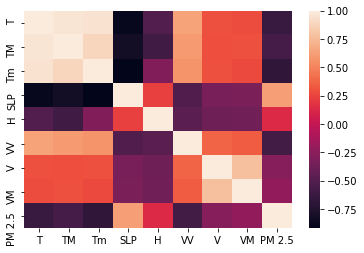

In [96]:
sns.heatmap(data.corr())

In [97]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [98]:
x=data.iloc[:,:-1] #independent features
y=data.iloc[:,-1] #dependent features

#Hyperparameters
  1.how many number of Hidden layers we should have?<br>
  2.How many number of neurons we should have in Hidden layers?<br>
  3.Learning Rate

In [108]:
def build_model(ap):
    model = keras.Sequential()
    for i in range(ap.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=ap.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            ap.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [109]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')


INFO:tensorflow:Reloading Oracle from existing project project/Air Quality Index/oracle.json
INFO:tensorflow:Reloading Tuner from project/Air Quality Index/tuner0.json


In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [110]:
tuner.search(X_train,y_train,
             epochs=5,
             validation=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [107]:
tuner.results_summary()

Results summary
Results in project/Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 288
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 13
units_0: 384
units_1: 416
learning_rate: 0.01
units_2: 320
units_3: 448
units_4: 320
units_5: 32
units_6: 96
units_7: 160
units_8: 352
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 16
units_0: 416
units_1: 448
learning_rate: 0.001
units_2: 480
units_3: 64
units_4: 32
units_5: 480
units_6: 384
units_7: 224
units_8: 256
units_9: 320
units_10: 448
units_11: 160
units_12: 32
units_13: 256
units_14: 160
units_15: 480
units_16: 64
units_17: 448
units_18: 160
Score: nan
Trial summary
Hyperparameters:
num_layers: 19
units_0: 288
units_1: 128
learning_rate: 0.001
units_2: 160
u